In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
import pydot 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


data_merged = pd.read_csv('data_merged.csv')



data_merged.drop(columns=['date','start_time','end_time','bikeid','from_station_name','to_station_name','age','gender','to_station_id'],inplace=True)


convert1 = {'Subscriber':1,'Customer':0}

data_merged['usertype']=data_merged.usertype.map(convert1)

y = data_merged['usertype']
data_merged.drop(columns='usertype',inplace=True)
data_merged.drop(data_merged.iloc[:,0:1],axis=1,inplace=True)



In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(data_merged,y,test_size=0.33,random_state=1)

tripduration           0
month                  0
hour                   0
day                    0
weekend                0
DailySnowDepth         0
HourlyTemperature      0
HourlyPrecipitation    0
dtype: int64

In [14]:
classifier = DecisionTreeClassifier(criterion="entropy")
classifier.fit(X=xtrain,y=ytrain)
# Show the structure of the decision tree classifier
print(classifier.tree_.__getstate__()['nodes'])
print(len(classifier.tree_.__getstate__()['nodes']))

y_pred = classifier.predict(xtest)

[(     1, 108308,  0, 1331.5, 0.58552605, 609586, 6.09586e+05)
 (     2,  46995,  0,  704.5, 0.32134001, 501405, 5.01405e+05)
 (     3,  20086,  1,    4.5, 0.18548455, 349440, 3.49440e+05) ...
 (170397, 170398,  3,   15.5, 1.        ,      2, 2.00000e+00)
 (    -1,     -1, -2,   -2. , 0.        ,      1, 1.00000e+00)
 (    -1,     -1, -2,   -2. , 0.        ,      1, 1.00000e+00)]


[0.8571166108773487, 0.1428833891226513, array([0.62027169, 0.91687776]), array([0.65312307, 0.90538703]), array([0.63627362, 0.91109617])]


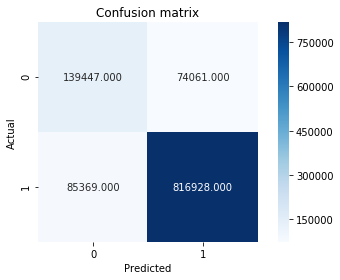

In [4]:
conf_matrix = metrics.confusion_matrix(ytest,y_pred)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

accuracy = metrics.accuracy_score(ytest, y_pred)
error = 1 - accuracy
precision = metrics.precision_score(ytest, y_pred, average = None)
recall = metrics.recall_score(ytest, y_pred, average = None)
F1_score = metrics.f1_score(ytest, y_pred, average = None)
print([accuracy, error, precision, recall, F1_score])

In [15]:
random_classifier = RandomForestClassifier(criterion='entropy',n_estimators=10)

random_classifier.fit(xtrain,ytrain)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
random_classifier.feature_importances_

array([0.75117226, 0.03149327, 0.06375386, 0.03358129, 0.04089631,
       0.00381157, 0.07175534, 0.0035361 ])

In [17]:
y_pred_random = random_classifier.predict(xtest)

In [18]:
y_pred_random

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

[0.880913920298423, 0.11908607970157703, array([0.5759366 , 0.92932786]), array([0.56402076, 0.93245509]), array([0.5699164 , 0.93088885])]


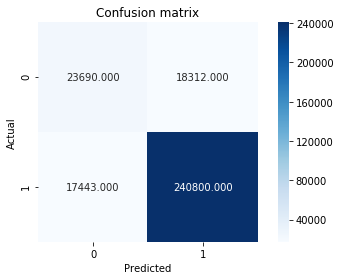

In [19]:
conf_matrix = metrics.confusion_matrix(ytest,y_pred_random)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

accuracy = metrics.accuracy_score(ytest, y_pred_random)
error = 1 - accuracy
precision = metrics.precision_score(ytest, y_pred_random, average = None)
recall = metrics.recall_score(ytest, y_pred_random, average = None)
F1_score = metrics.f1_score(ytest, y_pred_random, average = None)
print([accuracy, error, precision, recall, F1_score])

In [20]:
ada_classifier = AdaBoostClassifier(n_estimators=20)
ada_classifier.fit(xtrain,ytrain)

y_pred_ada = ada_classifier.predict(xtest)

[0.8736230793014909, 0.12637692069850914, array([0.79317373, 0.88364839]), array([0.45931768, 0.971659  ]), array([0.58175045, 0.9255662 ])]


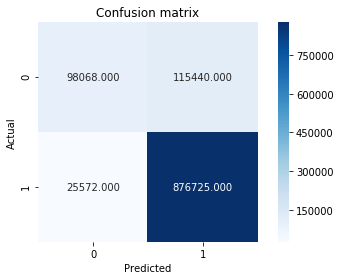

In [14]:
conf_matrix = metrics.confusion_matrix(ytest,y_pred_ada)
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()

accuracy = metrics.accuracy_score(ytest, y_pred_ada)
error = 1 - accuracy
precision = metrics.precision_score(ytest, y_pred_ada, average = None)
recall = metrics.recall_score(ytest, y_pred_ada, average = None)
F1_score = metrics.f1_score(ytest, y_pred_ada, average = None)
print([accuracy, error, precision, recall, F1_score])